In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv("/content/milknew.csv")

In [6]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [7]:
data.shape
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


In [8]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [9]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


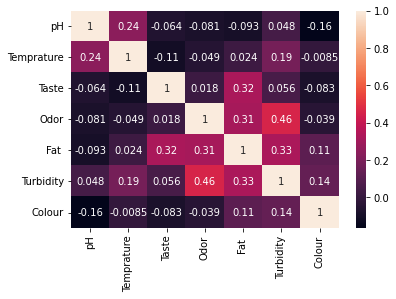

In [10]:
sns.heatmap(data.corr(),annot=True)

In [11]:
#label Encoding
from sklearn import preprocessing
label=preprocessing.LabelEncoder()

data['Grade']=label.fit_transform(data['Grade'])

In [12]:
data.head()
# 0-> high
# 1-> Low
#2->medium

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2


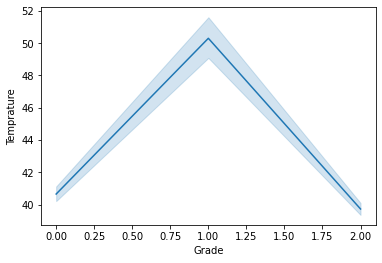

In [13]:
sns.lineplot(y="Temprature",x="Grade",data=data)

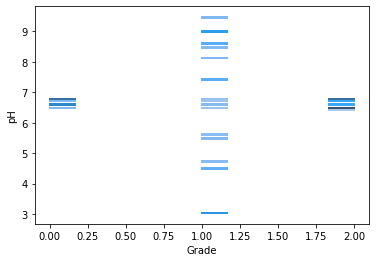

In [14]:
sns.histplot(x="Grade",y="pH",data=data)

In [15]:
print(data[data["Grade"]==1].shape)
print(data[data["Grade"]==2].shape)
print(data[data["Grade"]==0].shape)

(429, 8)
(374, 8)
(256, 8)


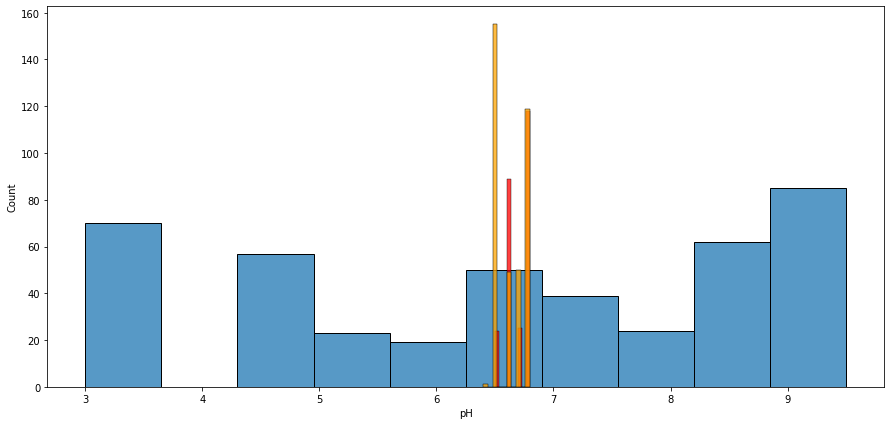

In [16]:
plt.figure(figsize=(15,7))
sns.histplot(x=data[data["Grade"]==1]["pH"])
sns.histplot(x=data[data["Grade"]==0]["pH"],color='red')
sns.histplot(x=data[data["Grade"]==2]["pH"],color='orange')
plt.show()

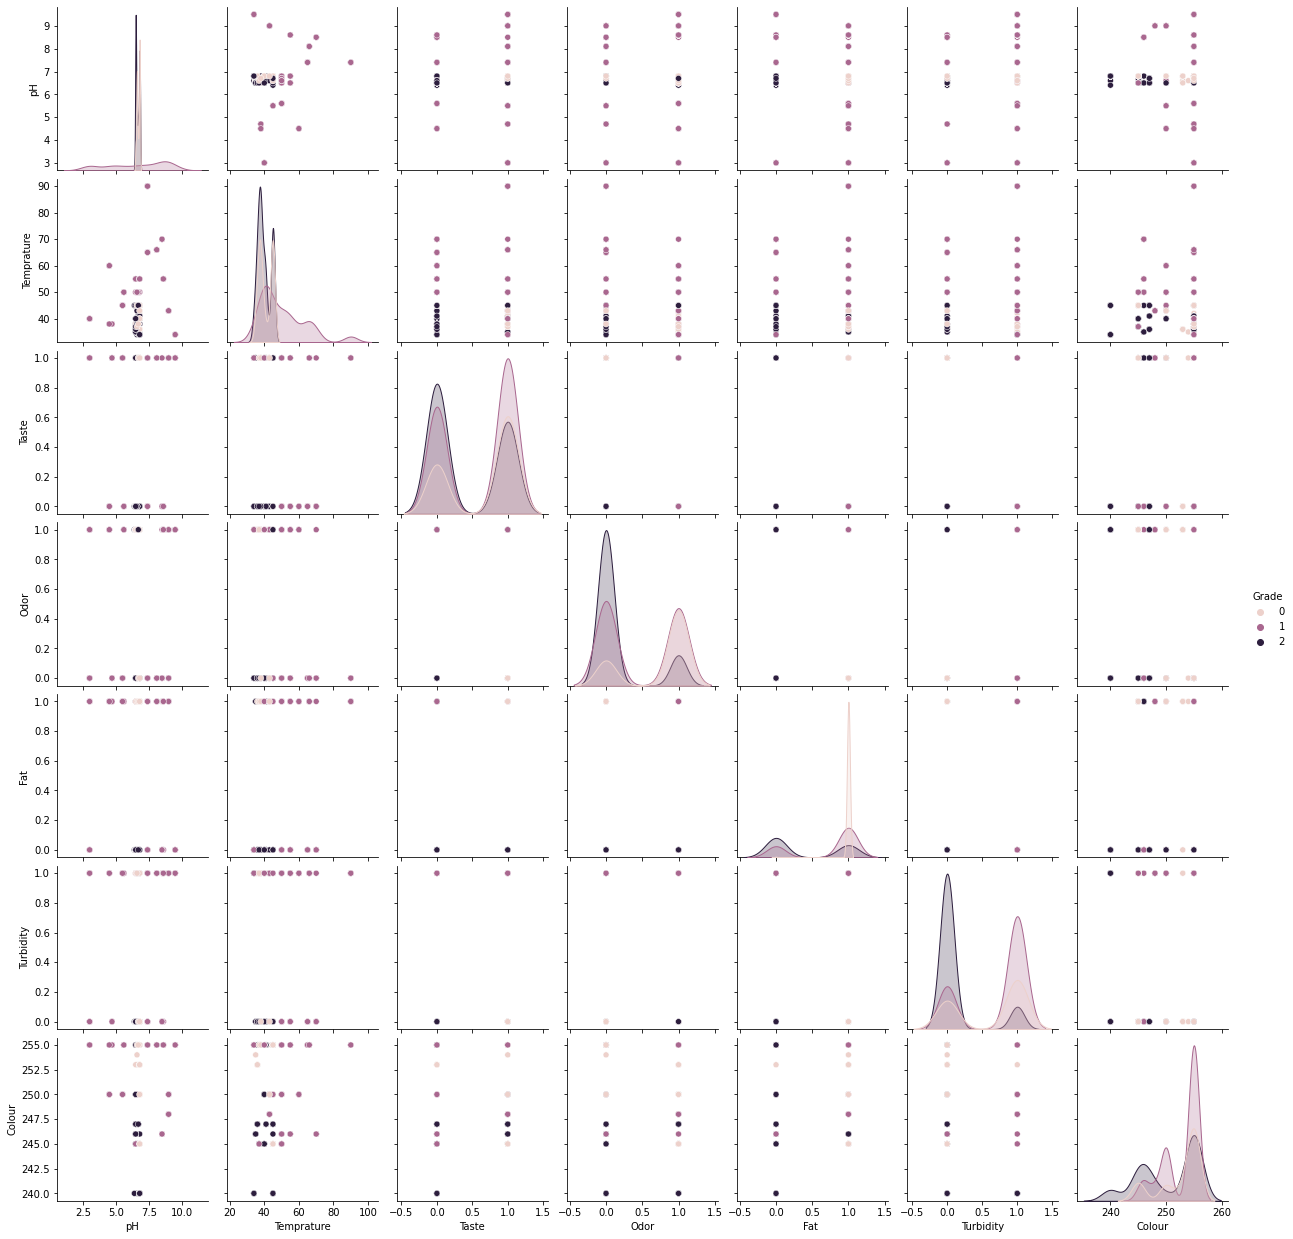

In [17]:
sns.pairplot(data,hue='Grade')

In [18]:
z=data['Grade'].value_counts()

In [19]:
#training :-

from sklearn.model_selection import train_test_split

In [20]:
x=data.drop(["Grade"],axis=1)

In [21]:
y=data["Grade"]

In [22]:
print(x.head())
print("\n")
print(y.head())

    pH  Temprature  Taste  Odor  Fat   Turbidity  Colour
0  6.6          35      1     0     1          0     254
1  6.6          36      0     1     0          1     253
2  8.5          70      1     1     1          1     246
3  9.5          34      1     1     0          1     255
4  6.6          37      0     0     0          0     255


0    0
1    0
2    1
3    1
4    2
Name: Grade, dtype: int64


In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=True)

In [24]:
#importing algorithms 

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [25]:
from sklearn import tree

clf=tree.DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)

In [26]:
y_knn=knn.predict(x_test)
print(y_knn)
y_clf=clf.predict(x_test)
print(y_clf)

[0 1 1 0 0 1 1 2 1 2 0 0 1 1 2 0 0 2 2 0 0 1 1 2 1 0 0 0 2 2 2 2 1 0 1 1 2
 2 2 2 1 2 2 1 1 1 0 1 2 0 0 0 2 0 0 1 1 2 0 1 2 1 2 0 1 2 1 0 1 0 2 1 0 1
 0 0 1 1 1 1 1 1 1 2 2 0 1 1 2 0 2 1 2 1 1 1 2 2 0 1 1 1 1 0 1 1 0 2 2 0 2
 2 2 0 0 0 1 0 2 1 0 0 1 1 0 1 0 2 0 2 1 2 0 1 0 0 0 1 1 2 0 1 0 1 2 2 1 1
 2 2 0 1 0 0 1 0 0 1 2 1 1 0 1 2 2 2 1 1 1 1 1 2 2 0 1 1 1 0 2 2 1 1 2 1 2
 2 0 1 0 1 0 2 1 1 1 1 2 2 2 0 1 0 1 0 2 1 0 1 1 1 0 1]
[0 1 1 0 0 1 1 2 1 2 0 0 1 1 2 0 0 2 2 0 0 1 1 2 1 0 0 0 2 2 2 2 1 0 1 1 2
 2 2 2 1 2 2 1 1 1 0 1 2 0 0 0 2 0 0 1 1 2 0 1 2 1 2 0 1 2 1 0 1 0 2 1 0 1
 0 0 1 1 1 1 1 1 1 1 2 0 1 1 2 0 2 1 2 1 1 1 2 2 0 1 1 1 1 0 1 1 0 2 2 0 2
 2 2 0 0 0 1 0 2 1 0 0 1 1 0 1 0 2 0 2 1 2 0 1 0 0 0 1 1 2 0 1 0 1 2 2 1 1
 2 2 0 1 0 0 1 0 0 1 2 1 1 0 1 2 2 2 1 1 1 1 1 2 0 0 1 1 1 0 2 2 1 1 2 1 2
 2 0 1 0 1 0 2 1 1 1 1 2 2 2 0 1 2 1 0 2 1 0 1 1 1 0 1]


In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [28]:
print(confusion_matrix(y_test,y_knn))

[[63  0  1]
 [ 0 89  1]
 [ 0  0 58]]


In [29]:
print(confusion_matrix(y_test,y_clf))

[[63  0  1]
 [ 0 90  0]
 [ 0  0 58]]


In [30]:
print(accuracy_score(y_test,y_knn))
print(accuracy_score(y_test,y_clf))

0.9905660377358491
0.9952830188679245


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
